In [16]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector

qasm_sim = Aer.get_backend('qasm_simulator')
statevec_sim = Aer.get_backend('statevector_simulator')

In [17]:
# number of qubits for the function's input
n = 3

In [18]:
# create quantum and classical registers
qr = QuantumRegister(n+1)
cr = ClassicalRegister(1)

In [19]:
# create quantum circuit
circuit = QuantumCircuit(qr, cr)

In [20]:
# initialize input qubits to 0
circuit.x(qr[0:n])
orig_statevec = execute(circuit, backend=statevec_sim).result().get_statevector()
circuit.measure(qr[0], cr[0])
circuit.measure(qr[1], cr[0])
circuit.measure(qr[2], cr[0])
circuit.measure(qr[3], cr[0])
circuit.draw()

┌───┐┌─┐         
q16_0: ┤ X ├┤M├─────────
       ├───┤└╥┘┌─┐      
q16_1: ┤ X ├─╫─┤M├──────
       ├───┤ ║ └╥┘┌─┐   
q16_2: ┤ X ├─╫──╫─┤M├───
       └───┘ ║  ║ └╥┘┌─┐
q16_3: ──────╫──╫──╫─┤M├
             ║  ║  ║ └╥┘
 c1: 1/══════╩══╩══╩══╩═
             0  0  0  0

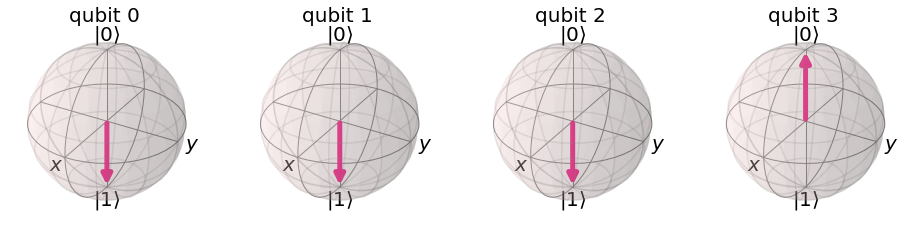

In [21]:
plot_bloch_multivector(orig_statevec)

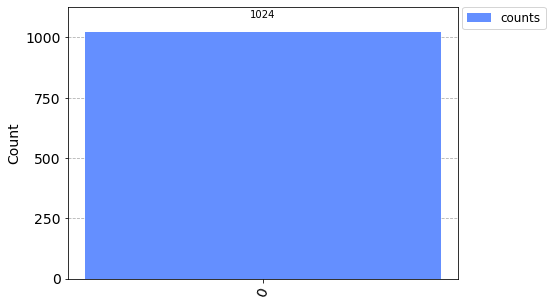

In [22]:
orig_counts = execute(circuit, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['counts'])

In [23]:
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[0:n])
# apply Hadamard gates to all qubits
for i in range(n+1):
    circuit.h(qr[i])
statevec = execute(circuit, backend=statevec_sim).result().get_statevector()
circuit.measure(qr[0], cr[0])
circuit.measure(qr[1], cr[0])
circuit.measure(qr[2], cr[0])
circuit.measure(qr[3], cr[0])
circuit.draw()

┌───┐┌───┐┌─┐         
q16_0: ┤ X ├┤ H ├┤M├─────────
       ├───┤├───┤└╥┘┌─┐      
q16_1: ┤ X ├┤ H ├─╫─┤M├──────
       ├───┤├───┤ ║ └╥┘┌─┐   
q16_2: ┤ X ├┤ H ├─╫──╫─┤M├───
       ├───┤└───┘ ║  ║ └╥┘┌─┐
q16_3: ┤ H ├──────╫──╫──╫─┤M├
       └───┘      ║  ║  ║ └╥┘
 c1: 1/═══════════╩══╩══╩══╩═
                  0  0  0  0

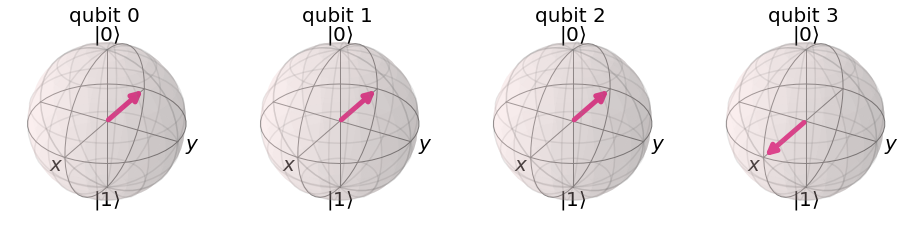

In [24]:
plot_bloch_multivector(statevec)

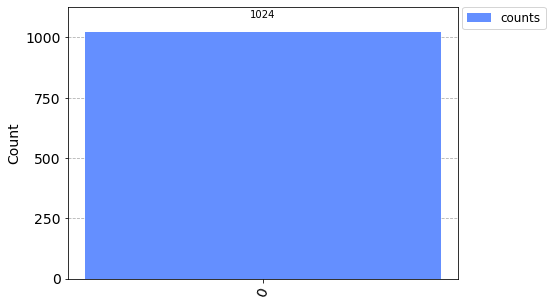

In [25]:
counts = execute(circuit, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['counts'])

In [26]:
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[0:n])

# apply Hadamard gates to all qubits
for i in range(n+1):
    circuit.h(qr[i])
    
# apply function to input qubits as a unitary operation
# in this example, we will use the function f(x) = x XOR y
circuit.cx(qr[0], qr[n])

# apply Hadamard gate to the ancilla qubit
circuit.h(qr[n])

statevec = execute(circuit, backend=statevec_sim).result().get_statevector()
circuit.measure(qr[0], cr[0])
circuit.measure(qr[1], cr[0])
circuit.measure(qr[2], cr[0])
circuit.measure(qr[3], cr[0])
# measure the ancilla qubit
# circuit.measure(qr[n], cr[0])
circuit.draw()

┌───┐┌───┐          ┌─┐         
q16_0: ┤ X ├┤ H ├──■───────┤M├─────────
       ├───┤├───┤  │       └╥┘┌─┐      
q16_1: ┤ X ├┤ H ├──┼────────╫─┤M├──────
       ├───┤├───┤  │        ║ └╥┘┌─┐   
q16_2: ┤ X ├┤ H ├──┼────────╫──╫─┤M├───
       ├───┤└───┘┌─┴─┐┌───┐ ║  ║ └╥┘┌─┐
q16_3: ┤ H ├─────┤ X ├┤ H ├─╫──╫──╫─┤M├
       └───┘     └───┘└───┘ ║  ║  ║ └╥┘
 c1: 1/═════════════════════╩══╩══╩══╩═
                            0  0  0  0

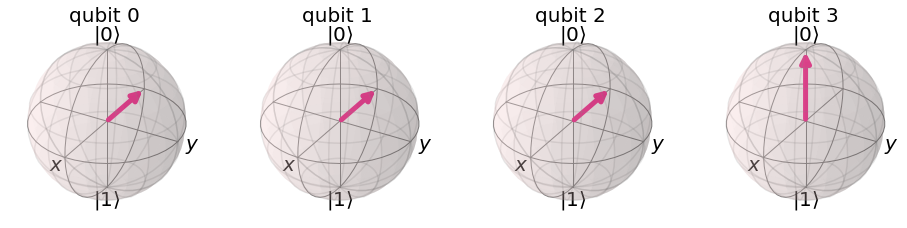

In [27]:
plot_bloch_multivector(statevec)

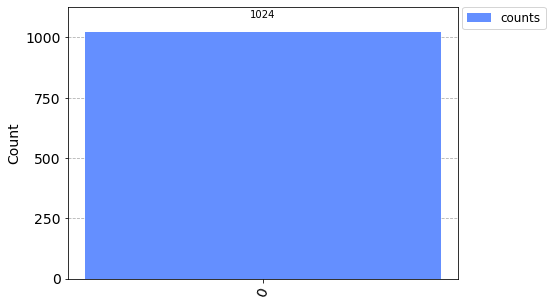

In [28]:
# execute the circuit and get the measurement result
counts = execute(circuit, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['counts'])

In [29]:
# print the measurement result
print(orig_counts)            

{'0': 1024}


The output of the code is not fixed because the measurement of the ancilla qubit is probabilistic. Even though the function is balanced, there is a 50% probability of measuring a 0 and a 50% probability of measuring a 1. In this case, the output happened to be 0, but if you were to run the code again, you might see a different outcome.

In [33]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

# Set the number of qubits and the function to be evaluated
n = 3
function = lambda x: x % 2

# Initialize the quantum and classical registers
qr = QuantumRegister(n+1)
cr = ClassicalRegister(1)

# Create the quantum circuit
qc = QuantumCircuit(qr, cr)

# Initialize the input qubits to 0
for i in range(n):
    qc.x(qr[i])

# Put the qubits in a superposition of all possible input states
for i in range(n):
    qc.h(qr[i])

# Apply the function to all possible input states simultaneously
for i in range(2**n):
    if function(i) == 0:
        qc.x(qr[n])
    qc.cx(qr[n], qr[0])
    for j in range(1, n):
        qc.cx(qr[j-1], qr[j])
    if function(i) == 0:
        qc.x(qr[n])

# Put the ancilla qubit in a superposition
qc.h(qr[n])

# Measure the ancilla qubit
qc.measure(qr[n], cr[0])

# Execute the circuit and retrieve the results
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1)
result = job.result()
counts = result.get_counts(qc)

# Print the result
if '0' in counts:
    print("The function is constant.")
else:
    print("The function is balanced.")


The function is balanced.
